<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.130368  43.862329  43.036680 -0.000423  184.028954   
      1.0    32.230576  59.551627  44.025146  0.008013  145.815363   
      2.0    96.265953  42.961231  97.294365  0.012938  246.534486   
      3.0    87.981134  31.555272  32.686952 -0.030551  162.192807   
      4.0    38.232695  63.493879  26.249310  0.005833  137.981716   
...                ...        ...        ...       ...         ...   
999.0 25.0   67.360671  69.683673  31.700656 -0.003774  178.741227   
      26.0   87.562621  72.748979  87.233701 -0.001864  257.543438   
      27.0   44.723573  71.956699  90.392223  0.003597  217.076092   
      28.0   88.258264  85.052318  37.396065  0.000490  220.707137   
      29.0   93.558112  37.084017  20.267785  0.002696  160.912609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.022912  0.006042  
      1.0    145.807179  0.008184  
      2.0    246.518127  0.016359  
      3.0    162.214757 -0.021950  
      4.0    137.974364  0.007352  
...                 ...       ...  
999.0 25.0   178.745770 -0.004544  
      26.0   257.546695 -0.003257  
      27.0   217.073011  0.003081  
      28.0   220.708429 -0.001292  
      29.0   160.909943  0.002666  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.130368  43.862329  43.036680 -0.000423  184.028954   
      1.0    32.230576  59.551627  44.025146  0.008013  145.815363   
      2.0    96.265953  42.961231  97.294365  0.012938  246.534486   
      3.0    87.981134  31.555272  32.686952 -0.030551  162.192807   
      4.0    38.232695  63.493879  26.249310  0.005833  137.981716   
...                ...        ...        ...       ...         ...   
999.0 25.0   67.360671  69.683673  31.700656 -0.003774  178.741227   
      26.0   87.562621  72.748979  87.233701 -0.001864  257.543438   
      27.0   44.723573  71.956699  90.392223  0.003597  217.076092   
      28.0   88.258264  85.052318  37.396065  0.000490  220.707137   
      29.0   93.558112  37.084017  20.267785  0.002696  160.912609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.022912  0.006042  
      1.0    145.807179  0.008184  
      2.0    246.518127  0.016359  
      3.0    162.214757 -0.021950  
      4.0    137.974364  0.007352  
...                 ...       ...  
999.0 25.0   178.745770 -0.004544  
      26.0   257.546695 -0.003257  
      27.0   217.073011  0.003081  
      28.0   220.708429 -0.001292  
      29.0   160.909943  0.002666  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.130368,43.862329,43.036680,-0.000423,184.028954,184.022912,0.006042
1,0.0,1.0,32.230576,59.551627,44.025146,0.008013,145.815363,145.807179,0.008184
2,0.0,2.0,96.265953,42.961231,97.294365,0.012938,246.534486,246.518127,0.016359
3,0.0,3.0,87.981134,31.555272,32.686952,-0.030551,162.192807,162.214757,-0.021950
4,0.0,4.0,38.232695,63.493879,26.249310,0.005833,137.981716,137.974364,0.007352
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.360671,69.683673,31.700656,-0.003774,178.741227,178.745770,-0.004544
29996,999.0,26.0,87.562621,72.748979,87.233701,-0.001864,257.543438,257.546695,-0.003257
29997,999.0,27.0,44.723573,71.956699,90.392223,0.003597,217.076092,217.073011,0.003081
29998,999.0,28.0,88.258264,85.052318,37.396065,0.000490,220.707137,220.708429,-0.001292


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.130368  43.862329  43.036680 -0.000423  184.028954   
      1.0    32.230576  59.551627  44.025146  0.008013  145.815363   
      2.0    96.265953  42.961231  97.294365  0.012938  246.534486   
      3.0    87.981134  31.555272  32.686952 -0.030551  162.192807   
      4.0    38.232695  63.493879  26.249310  0.005833  137.981716   
...                ...        ...        ...       ...         ...   
999.0 25.0   67.360671  69.683673  31.700656 -0.003774  178.741227   
      26.0   87.562621  72.748979  87.233701 -0.001864  257.543438   
      27.0   44.723573  71.956699  90.392223  0.003597  217.076092   
      28.0   88.258264  85.052318  37.396065  0.000490  220.707137   
      29.0   93.558112  37.084017  20.267785  0.002696  160.912609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.022912  0.006042  
      1.0    145.807179  0.008184  
      2.0    246.518127  0.016359  
      3.0    162.214757 -0.021950  
      4.0    137.974364  0.007352  
...                 ...       ...  
999.0 25.0   178.745770 -0.004544  
      26.0   257.546695 -0.003257  
      27.0   217.073011  0.003081  
      28.0   220.708429 -0.001292  
      29.0   160.909943  0.002666  

[30000 rows x 7 columns]

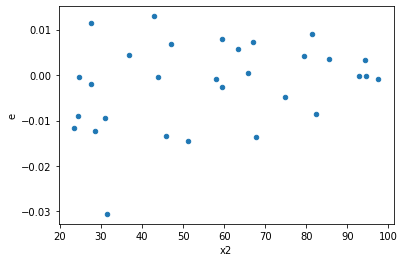

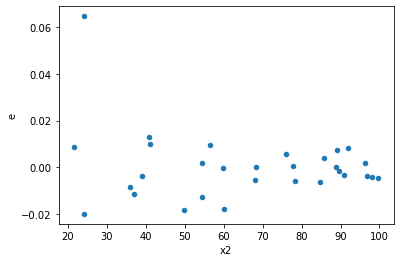

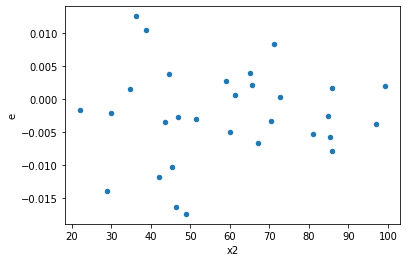

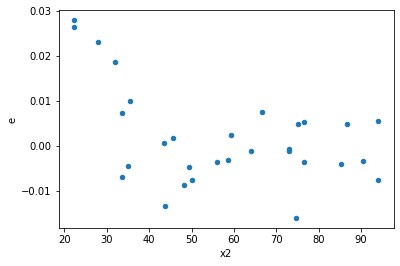

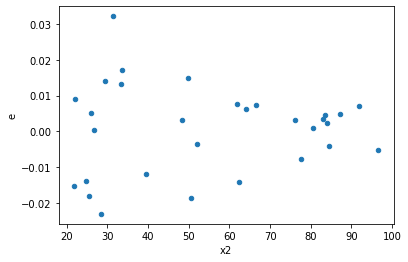

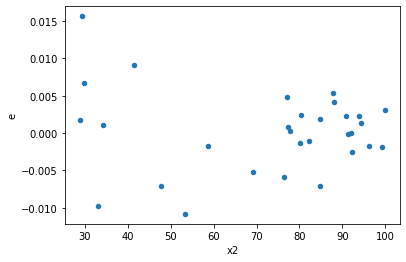

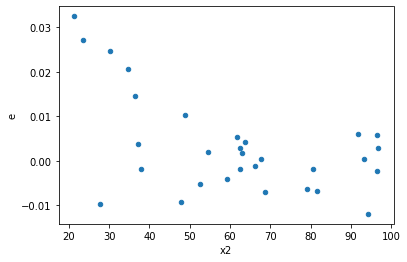

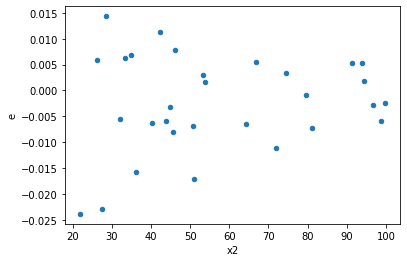

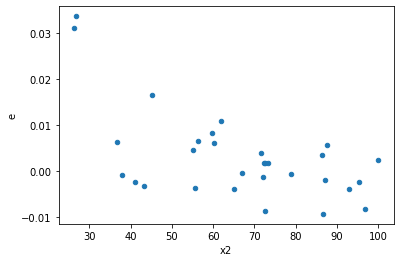

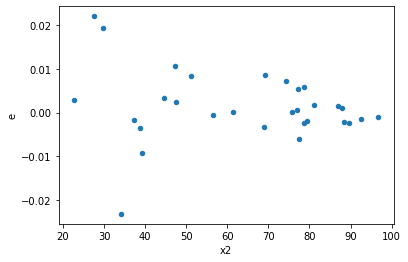

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,9.0,9.0,0.0005683499996525665,0.0008031347628575218,6.314999996139627e-05,8.923719587305798e-05,1.4130989062170842,0.6147641115394986,0.6926179442302507,0.3073820557697493,Reject001=1 : Homoscedasticity
13.0,9.0,9.0,0.0002402440136570295,0.0004938619170421269,2.66937792952255e-05,5.4873546338014096e-05,2.055667941625219,0.29805329689574966,0.8509733515521252,0.14902664844787483,Reject001=1 : Homoscedasticity
15.0,9.0,9.0,0.0007451485052310004,0.0013216892973072288,8.279427835900004e-05,0.00014685436636746986,1.7737260264616614,0.4061618168632686,0.7969190915683657,0.2030809084316343,Reject001=1 : Homoscedasticity
43.0,9.0,9.0,0.0008920702391969572,0.0012587247366241602,9.911891546632858e-05,0.00013985830406935113,1.4110152780763832,0.6162675199798735,0.6918662400100632,0.30813375998993675,Reject001=1 : Homoscedasticity
54.0,9.0,9.0,0.001448300069513068,0.0023895337351170372,0.00016092222994589645,0.0002655037483463375,1.649888573105172,0.46730317475308314,0.7663484126234584,0.23365158737654157,Reject001=1 : Homoscedasticity
79.0,9.0,9.0,0.0017298576327409087,0.001748644896281759,0.00019220640363787876,0.0001942938773646399,1.0108605836603342,0.9874258547593768,0.5062870726203116,0.4937129273796884,Reject001=1 : Homoscedasticity
81.0,9.0,9.0,0.0009533076423486545,0.0021201805211611994,0.00010592307137207273,0.00023557561346235548,2.2240255159790094,0.24946734484793853,0.8752663275760307,0.12473367242396927,Reject001=1 : Homoscedasticity
84.0,9.0,9.0,0.0006221167972384898,0.0009235237208550609,6.912408858205442e-05,0.00010261374676167343,1.4844860723171023,0.5655639193994282,0.7172180403002859,0.2827819596997141,Reject001=1 : Homoscedasticity
88.0,9.0,9.0,0.0005132088553883179,0.0005727194499881018,5.702320615425755e-05,6.363549444312241e-05,1.115957848300874,0.8728564629610127,0.5635717685194936,0.43642823148050636,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0010055386441452333,0.0003303984705782062,0.00011172651601613703,3.6710941175356244e-05,0.32857859069062856,0.11279752988340008,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.003820303690130504,0.0005076764355294838,0.00042447818779227825,5.640849283660931e-05,0.13288902577065573,0.0060433945894416375,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,0.0005196995899909286,0.00021684689510264964,5.774439888788096e-05,2.4094099455849958e-05,0.4172543124508424,0.20899296825568353,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.000664018684441804,0.00028132403318326755,7.37798538268671e-05,3.125822590925195e-05,0.4236688511555331,0.2168199740825709,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.0015837198497732558,0.0008360524959870301,0.00017596887219702842,9.289472177633668e-05,0.5279042856643675,0.35520603730584077,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.00034640269363940546,0.0001268559469233522,3.848918818215616e-05,1.40951052137058e-05,0.36620947022832717,0.15063417774875495,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.0009030496656873479,0.00028130038048419613,0.00010033885174303865,3.1255597831577345e-05,0.3115004535991793,0.0972890516191088,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.00127567766100367,0.00038885931359369184,0.00014174196233374112,4.320659039929909e-05,0.304825682443751,0.09152849841432616,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.0005683499996525665,0.0008031347628575218,6.314999996139627e-05,8.923719587305798e-05,1.4130989062170842,0.6147641115394986,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      720
Reject001=0 : Heteroscedasticity    280
Name: Result_test, dtype: int64